In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [4]:
#Load The Dataset
dataset = pd.read_csv('/content/abalone.data', sep=',', header=None)
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

#Joining the column names
dataset.columns = column_names

In [5]:
# Initial Overview of The Dataset

print(dataset.head())
print(dataset.describe())

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
            Length     Diameter       Height  WholeWeight  ShuckedWeight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%    

In [6]:
#Keeping Only the 2 Classes

top_n_classes = 2
class_counts = dataset['Rings'].value_counts()
top_n_classes = class_counts.head(top_n_classes).index.tolist()
dataset['NewClass'] = dataset['Rings'].apply(lambda x: x if x in top_n_classes else 'Other')

dataset2 = dataset[dataset['NewClass'] != 'Other']

dataset2.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,NewClass
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,10
13,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,10


In [7]:
columns_to_delete = ['Rings']
dataset2 = dataset2.drop(columns=columns_to_delete)


dataset2.rename(columns={'NewClass': 'Rings'}, inplace=True)

dataset2.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10
13,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10


In [8]:
class_counts = dataset2['Rings'].value_counts()
class_counts

9     689
10    634
Name: Rings, dtype: int64

In [9]:
X = dataset2.drop(columns=['Rings'])
y = dataset2['Rings']

In [10]:
X = X.reset_index(drop=True)
X.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
2,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
3,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135
4,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205


In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Sex'] = X['Sex'] / (X['Sex'].max() + 1)
X['Sex'] = X['Sex'].round(1)

print(y)
X.tail()

[0 1 0 ... 1 0 1]


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
1318,0.7,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815
1319,0.7,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405
1320,0.7,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
1321,0.7,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
1322,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [12]:
def ac(value):
  #return (1/(1+np.exp(-value)))     #Sigmoid
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))

In [13]:
# Widrow Delta Rule

def perceptron_train(in_data,labels,alpha):
    X=np.array(in_data)
    y=np.array(labels)
    weights=np.random.random(X.shape[1])
    original=weights
    bias=np.random.random_sample()
    for key in range(X.shape[0]):
        a=ac(np.matmul(np.transpose(weights),X[key]))
        #print(a)
        dt=0
        if a>=0.9:
            dt=1
        elif a<(0.9):
            dt=0
        weights=weights+alpha*(dt-y[key])*X[key]
        #print('Iteration '+str(key)+': '+str(weights))

    print('Difference: '+str(weights-original))
    return weights

In [14]:
def perceptron_test(in_data,label_shape,weights):
    X=np.array(in_data)
    y=np.zeros(label_shape)
    for key in range(X.shape[0]):
        a=ac((weights*X[key]).sum())
        #print(a)
        y[key]=0
        if a>=0.9:
            y[key]=1
        elif a<(0.9):
            y[key]=0
    return y

In [15]:
def score(result,labels):
    difference=result-np.array(labels)
    correct_ctr=0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            correct_ctr+=1
    score=correct_ctr*100/difference.size
    print('Score='+str(score))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1058, 8), (1058,), (265, 8), (265,))

In [17]:
# Learning rate
alpha = 0.00009

# Train
weights = perceptron_train(X_train, y_train, alpha)

Difference: [0.005625   0.0055197  0.00434385 0.0014265  0.01589269 0.00785637
 0.00350082 0.00381069]


In [18]:
# Test
result_test=perceptron_test(X_test,y_test.shape,weights)
print(result_test)

[0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0.]


In [19]:
score(result_test,y_test)

Score=60.0


Difference: [0.0037     0.0036755  0.00288675 0.00094925 0.00971847 0.00475535
 0.00214308 0.00237812]
Difference: [ 0.002325   -0.00083625 -0.00063643 -0.00020036  0.00233681  0.00145971
  0.00053853  0.00028867]
Difference: [0.00653714 0.01085314 0.00847314 0.00281971 0.02050257 0.00958594
 0.0045034  0.00547094]
Difference: [ 0.00139643 -0.00427914 -0.00332745 -0.00112777 -0.00372042 -0.00128198
 -0.00079772 -0.00136765]
Difference: [0.00914143 0.01310304 0.010224   0.003411   0.02386504 0.01109234
 0.00525301 0.00642208]
Difference: [ 0.00013571 -0.00651429 -0.00506825 -0.00171136 -0.00715974 -0.00275273
 -0.00156309 -0.00239098]
Difference: [0.01182857 0.0165025  0.01285393 0.00428571 0.02853707 0.01318829
 0.00627225 0.00775621]
Difference: [ 0.0003675  -0.0085605  -0.00666863 -0.00225075 -0.01123298 -0.00457429
 -0.00244984 -0.00348821]
Difference: [ 0.00568071 -0.00088825 -0.00067414 -0.00023257  0.00293221  0.00188791
  0.00068538  0.00032882]
Difference: [-0.0076475  -0.01628

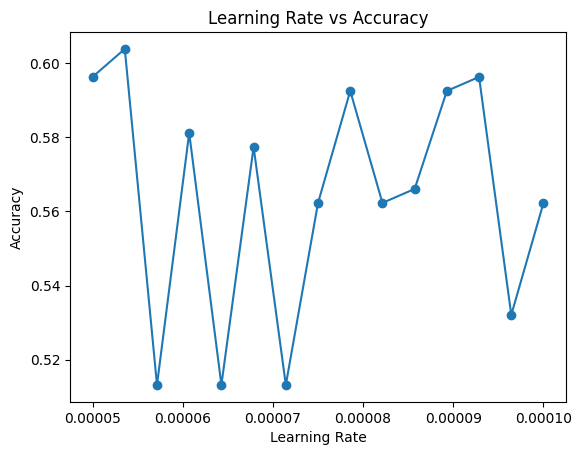

In [21]:
# Define a range of learning rates
learning_rates = np.linspace(0.00005, 0.0001, 15)

# Lists to store accuracy values for each learning rate
accuracies = []

# Iterate through different learning rates
for alpha in learning_rates:
    # Train the perceptron model
    weights = perceptron_train(X_train, y_train, alpha)

    # Test the perceptron model
    result_test = perceptron_test(X_test, y_test.shape, weights)

    # Calculate accuracy
    acc = accuracy_score(y_test, result_test)
    accuracies.append(acc)

# Plotting the learning rate vs accuracy curve
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Learning Rate vs Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


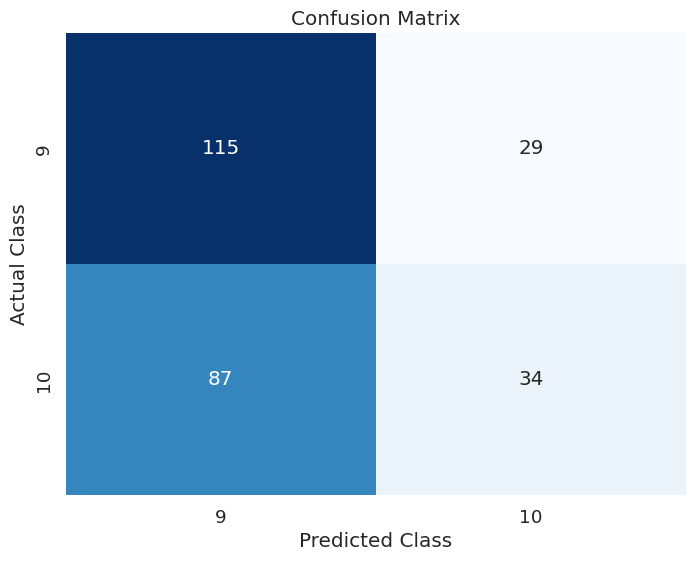

In [23]:
class_labels = dataset2['Rings'].unique()
confusion = confusion_matrix(y_test, result_test)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()